In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools

from collections import Counter

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import adam, RMSprop
from sklearn.model_selection import train_test_split
from keras import backend as K

#one-hot encoding
from keras.utils.np_utils import to_categorical

from sklearn.metrics import confusion_matrix, f1_score

#Data augmentation
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import EarlyStopping, ReduceLROnPlateau


Using TensorFlow backend.


In [2]:
train_data = pd.read_csv(r'D:\ML\python\MNIST\train.csv')
test = pd.read_csv(r'D:\ML\python\MNIST\test.csv')
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
x_train = train_data.drop(labels = 'label', axis=1)
y_train = train_data['label']

In [4]:
x_train = x_train / 255

In [5]:
test = test / 255

In [6]:
x_train = x_train.values.reshape([x_train.shape[0], 28, 28, 1])

In [7]:
test = test.values.reshape([test.shape[0], 28, 28, 1])

# label Encoding

In [8]:
y_train = to_categorical(y_train, num_classes=10)
#この操作を二回以上するとラベルが0,1のみになるため注意

In [9]:
y_train.shape

(42000, 10)

In [10]:
y_train[:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Model

In [12]:
input_shape = (28, 28, 1)
batch_size = 64
epochs = 10
num_classes = 10

In [13]:
model = Sequential()
#he_normal無し
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
optimizer=RMSprop()
#誤差逆伝搬の関数の初期値指定なし

In [15]:
#エポックによる過学習を止めない
#learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=0.0001)

In [16]:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 128)         73856     
__________

In [18]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 37800 samples, validate on 4200 samples
Epoch 1/10
37800/37800 [==============================] - 13s 343us/step - loss: 0.1185 - acc: 0.9640 - val_loss: 0.0601 - val_acc: 0.9819
Epoch 2/10
37800/37800 [==============================] - 7s 189us/step - loss: 0.0466 - acc: 0.9856 - val_loss: 0.0419 - val_acc: 0.9883
Epoch 3/10
37800/37800 [==============================] - 7s 191us/step - loss: 0.0336 - acc: 0.9894 - val_loss: 0.0500 - val_acc: 0.9831
Epoch 4/10
37800/37800 [==============================] - 7s 192us/step - loss: 0.0251 - acc: 0.9918 - val_loss: 0.0531 - val_acc: 0.9829
Epoch 5/10
37800/37800 [==============================] - 7s 191us/step - loss: 0.0222 - acc: 0.9934 - val_loss: 0.0619 - val_acc: 0.9831
Epoch 6/10
37800/37800 [==============================] - 7s 192us/step - loss: 0.0192 - acc: 0.9937 - val_loss: 0.0376 - val_acc: 0.9855
Epoch 7/10
37800/37800 [==============================] - 7s 191us/step - 

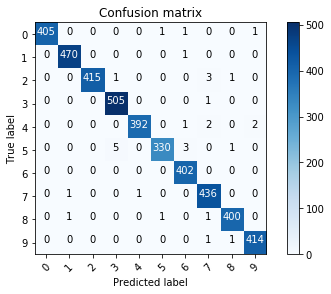

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred, axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

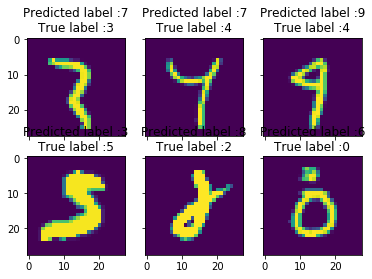

In [24]:
# Errors are difference between predicted labels and true labels
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = Y_pred[errors]
Y_true_errors = Y_true[errors]
X_val_errors = x_test[errors]

def display_errors(errors_index,img_errors,pred_errors, obs_errors):
    """ This function shows 6 images with their predicted and real labels"""
    n = 0
    nrows = 2
    ncols = 3
    fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
    for row in range(nrows):
        for col in range(ncols):
            error = errors_index[n]
            ax[row,col].imshow((img_errors[error]).reshape((28,28)))
            ax[row,col].set_title("Predicted label :{}\nTrue label :{}".format(pred_errors[error],obs_errors[error]))
            n += 1

# Probabilities of the wrong predicted numbers
Y_pred_errors_prob = np.max(Y_pred_errors,axis = 1)

# Predicted probabilities of the true values in the error set
true_prob_errors = np.diagonal(np.take(Y_pred_errors, Y_true_errors, axis=1))

# Difference between the probability of the predicted label and the true label
delta_pred_true_errors = Y_pred_errors_prob - true_prob_errors

# Sorted list of the delta prob errors
sorted_dela_errors = np.argsort(delta_pred_true_errors)

# Top 6 errors 
most_important_errors = sorted_dela_errors[-6:]

# Show the top 6 errors
display_errors(most_important_errors, X_val_errors, Y_pred_classes_errors, Y_true_errors)

In [25]:
predicted_classes = model.predict_classes(test)

In [26]:
predicted_classes[:10]

array([2, 0, 9, 9, 3, 7, 0, 3, 0, 3], dtype=int64)

In [27]:
submissions = pd.DataFrame({'ImageID' : list(range(1, len(predicted_classes)+1)), 
                            'Label' : predicted_classes})
submissions.to_csv(r'D:\ML\python\MNIST\first_model.csv', index=False, header=True)